### The purpose of this notebook to to find aragonite saturation (omegaA) values 

## Salish Sea

In [1]:
import gsw
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mocsy import mocsy
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

## Present Day - Summer

In [2]:
jun = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20150601_20150630.nc') #former carp files
juntemp = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20150601_20150630.nc') #grid

In [3]:
jul = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20150701_20150731.nc') #former carp files
jultemp = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20150701_20150731.nc') #grid

In [4]:
aug = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20150801_20150831.nc') #former carp files
augtemp = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20150801_20150831.nc') #grid

In [5]:
ii, ij = 0, 898
ji, jj = 0, 398

In [6]:
jul

<xarray.Dataset> Size: 287MB
Dimensions:                     (time: 1, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * time                        (time) datetime64[ns] 8B 2015-07-15T12:00:00
  * depth                       (depth) float32 160B 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                       (gridY) int64 7kB 0 1 2 3 4 ... 894 895 896 897
  * gridX                       (gridX) int64 3kB 0 1 2 3 4 ... 394 395 396 397
Data variables:
    PAR                         (time, depth, gridY, gridX) float32 57MB ...
    turbidity                   (time, depth, gridY, gridX) float32 57MB ...
    dissolved_inorganic_carbon  (time, depth, gridY, gridX) float32 57MB ...
    total_alkalinity            (time, depth, gridY, gridX) float32 57MB ...
    dissolved_oxygen            (time, depth, gridY, gridX) float32 57MB ...
    CO2_flux                    (time, gridY, gridX) float32 1MB ...
Attributes:
    name:         SalishSeaCast_1m_chem_T_20150701_20150731
    description:  Month-averaged chemistry variables resampled from v202111 S...
    history:      2023-01-16 12:38 -08:00: Generated by reshapr.api.v1.extrac...
    Conventions:  CF-1.6

In [7]:
jun_Tinsitu = np.array(gsw.t_from_CT(juntemp.vosaline[0, :, :, :], juntemp.votemper[0, :,  :, :], 0))
jul_Tinsitu = np.array(gsw.t_from_CT(jultemp.vosaline[0, :, :, :], jultemp.votemper[0, :,  :, :], 0))
aug_Tinsitu = np.array(gsw.t_from_CT(augtemp.vosaline[0, :, :, :], augtemp.votemper[0, :,  :, :], 0))

In [8]:
jun_Spsu = 35/35.16504 * np.array(juntemp.vosaline[0, :, :, :])
jul_Spsu = 35/35.16504 * np.array(jultemp.vosaline[0, :, :, :])
aug_Spsu = 35/35.16504 * np.array(augtemp.vosaline[0, :, :, :])

In [9]:
jun_TA = np.array(jun.total_alkalinity[0, :,:, :])/1000.
jun_DIC = np.array(jun.dissolved_inorganic_carbon[0, :, :, :])/1000.

jul_TA = np.array(jul.total_alkalinity[0, :,:, :])/1000.
jul_DIC = np.array(jul.dissolved_inorganic_carbon[0, :, :, :])/1000.

aug_TA = np.array(aug.total_alkalinity[0, :,:, :])/1000.
aug_DIC = np.array(aug.dissolved_inorganic_carbon[0, :, :, :])/1000.

In [10]:
np.shape(jul_DIC)

(40, 898, 398)

In [11]:
ones = np.ones_like(jul_Spsu.flatten()) #.flatten()

In [12]:
np.shape(ones)

(14296160,)

In [13]:
response_tup = mocsy.mvars(temp=jun_Tinsitu.flatten(), sal=jun_Spsu.flatten(), alk=jun_TA.flatten(), 
                           dic=jun_DIC.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
jun_pH,jun_pco2,jun_fco2,jun_co2,jun_hco3,jun_co3,jun_OmegaA,jun_OmegaC,jun_BetaD,jun_DENis,jun_p,jun_Tis = response_tup

In [14]:
response_tup = mocsy.mvars(temp=jul_Tinsitu.flatten(), sal=jul_Spsu.flatten(), alk=jul_TA.flatten(), 
                           dic=jul_DIC.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
jul_pH,jul_pco2,jul_fco2,jul_co2,jul_hco3,jul_co3,jul_OmegaA,jul_OmegaC,jul_BetaD,jul_DENis,jul_p,jul_Tis = response_tup

In [15]:
response_tup = mocsy.mvars(temp=aug_Tinsitu.flatten(), sal=aug_Spsu.flatten(), alk=aug_TA.flatten(), 
                           dic=aug_DIC.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
aug_pH,aug_pco2,aug_fco2,aug_co2,aug_hco3,aug_co3,aug_OmegaA,aug_OmegaC,aug_BetaD,aug_DENis,aug_p,aug_Tis = response_tup

In [16]:
np.shape(jul_OmegaA)

(14296160,)

In [17]:
jun_arag=jun_OmegaA.reshape([40,ij-ii,jj-ji])
jul_arag=jul_OmegaA.reshape([40,ij-ii,jj-ji])
aug_arag=aug_OmegaA.reshape([40,ij-ii,jj-ji])

In [18]:
#open bathy file and meshmask
fbathy=nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_202108.nc')
fmesh=nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/mesh_mask202108.nc')

In [19]:
np.shape(jul_arag)

(40, 898, 398)

Text(0.5, 0.98, 'v202111 Summer $\\Omega_A$ (present-day)')

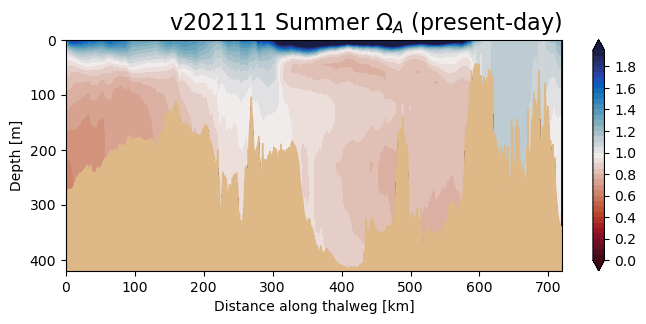

In [52]:
il=0
fig,ax=plt.subplots(1,1,figsize=(8,3))
#fig.title('Mesozooplankton Biomass')
levels = np.arange(0, 2, 0.05)


cb=visualisations.contour_thalweg(ax,(jun_arag[:,:,:]+\
                                      jul_arag[:,:,:]+\
                                      aug_arag[:,:,:])/3,fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance_r)
cb.set_label('', rotation=90,labelpad=6)
ax.set_ylim(420,0)

fig.suptitle('v202111 Summer $\Omega_A$ (present-day)', fontsize=16)

## Present Day - Winter

In [29]:
dec = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20151201_20151231.nc') #former carp files
dectemp = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20151201_20151231.nc') #grid

In [30]:
jan = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20150101_20150131.nc') #former carp files
jantemp = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20150101_20150131.nc') #grid

In [32]:
feb = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20150201_20150228.nc') #former carp files
febtemp = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_grid_T_20150201_20150228.nc') #grid

In [33]:
ii, ij = 0, 898
ji, jj = 0, 398

In [34]:
jan

<xarray.Dataset> Size: 287MB
Dimensions:                     (time: 1, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * depth                       (depth) float32 160B 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                       (gridY) int64 7kB 0 1 2 3 4 ... 894 895 896 897
  * gridX                       (gridX) int64 3kB 0 1 2 3 4 ... 394 395 396 397
  * time                        (time) datetime64[ns] 8B 2015-01-15T12:00:00
Data variables:
    PAR                         (time, depth, gridY, gridX) float32 57MB ...
    turbidity                   (time, depth, gridY, gridX) float32 57MB ...
    dissolved_inorganic_carbon  (time, depth, gridY, gridX) float32 57MB ...
    total_alkalinity            (time, depth, gridY, gridX) float32 57MB ...
    dissolved_oxygen            (time, depth, gridY, gridX) float32 57MB ...
    CO2_flux                    (time, gridY, gridX) float32 1MB ...
Attributes:
    name:         SalishSeaCast_1m_chem_T_20150101_20150131
    description:  Month-averaged chemistry and light variables extracted from...
    history:      2022-11-21 10:18 -08:00: Generated by `reshapr extract /res...
    Conventions:  CF-1.6

In [35]:
dec_Tinsitu = np.array(gsw.t_from_CT(dectemp.vosaline[0, :, :, :], dectemp.votemper[0, :,  :, :], 0))
jan_Tinsitu = np.array(gsw.t_from_CT(jantemp.vosaline[0, :, :, :], jantemp.votemper[0, :,  :, :], 0))
feb_Tinsitu = np.array(gsw.t_from_CT(febtemp.vosaline[0, :, :, :], febtemp.votemper[0, :,  :, :], 0))

In [36]:
dec_Spsu = 35/35.16504 * np.array(dectemp.vosaline[0, :, :, :])
jan_Spsu = 35/35.16504 * np.array(jantemp.vosaline[0, :, :, :])
feb_Spsu = 35/35.16504 * np.array(febtemp.vosaline[0, :, :, :])

In [37]:
dec_TA = np.array(dec.total_alkalinity[0, :,:, :])/1000.
dec_DIC = np.array(dec.dissolved_inorganic_carbon[0, :, :, :])/1000.

jan_TA = np.array(jan.total_alkalinity[0, :,:, :])/1000.
jan_DIC = np.array(jan.dissolved_inorganic_carbon[0, :, :, :])/1000.

feb_TA = np.array(feb.total_alkalinity[0, :,:, :])/1000.
feb_DIC = np.array(feb.dissolved_inorganic_carbon[0, :, :, :])/1000.

In [38]:
np.shape(jan_DIC)

(40, 898, 398)

In [39]:
ones = np.ones_like(jan_Spsu.flatten()) #.flatten()

In [40]:
np.shape(ones)

(14296160,)

In [41]:
response_tup = mocsy.mvars(temp=dec_Tinsitu.flatten(), sal=dec_Spsu.flatten(), alk=dec_TA.flatten(), 
                           dic=dec_DIC.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
dec_pH,dec_pco2,dec_fco2,dec_co2,dec_hco3,dec_co3,dec_OmegaA,dec_OmegaC,dec_BetaD,dec_DENis,dec_p,dec_Tis = response_tup

In [42]:
response_tup = mocsy.mvars(temp=jan_Tinsitu.flatten(), sal=jan_Spsu.flatten(), alk=jan_TA.flatten(), 
                           dic=jan_DIC.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
jan_pH,jan_pco2,jan_fco2,jan_co2,jan_hco3,jan_co3,jan_OmegaA,jan_OmegaC,jan_BetaD,jan_DENis,jan_p,jan_Tis = response_tup

In [43]:
response_tup = mocsy.mvars(temp=feb_Tinsitu.flatten(), sal=feb_Spsu.flatten(), alk=feb_TA.flatten(), 
                           dic=feb_DIC.flatten(), 
                       sil=0.*ones, phos=0.*ones, patm=0.*ones, depth=0.*ones, lat=0.*ones, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
feb_pH,feb_pco2,feb_fco2,feb_co2,feb_hco3,feb_co3,feb_OmegaA,feb_OmegaC,feb_BetaD,feb_DENis,feb_p,feb_Tis = response_tup

In [44]:
np.shape(jan_OmegaA)

(14296160,)

In [45]:
dec_arag=dec_OmegaA.reshape([40,ij-ii,jj-ji])
jan_arag=jan_OmegaA.reshape([40,ij-ii,jj-ji])
feb_arag=feb_OmegaA.reshape([40,ij-ii,jj-ji])

In [46]:
np.shape(jan_arag)

(40, 898, 398)

Text(0.5, 0.98, 'v202111 Winter $\\Omega_A$ (present-day)')

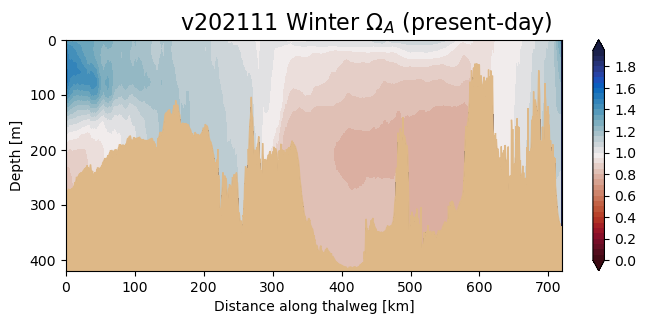

In [51]:
il=0
fig,ax=plt.subplots(1,1,figsize=(8,3))
#fig.title('Mesozooplankton Biomass')
levels = np.arange(0, 2, 0.05)


cb=visualisations.contour_thalweg(ax,(dec_arag[:,:,:]+\
                                      jan_arag[:,:,:]+\
                                      feb_arag[:,:,:])/3,fbathy,fmesh,clevels=levels,cmap=cmocean.cm.balance_r)
cb.set_label('', rotation=90,labelpad=6)
ax.set_ylim(420,0)

fig.suptitle('v202111 Winter $\Omega_A$ (present-day)', fontsize=16)